# Donacilla Cornea: Group Proposal and Data

**Introduction**

“Donacilla cornea is a small (up to 20mm in length), burrowing intertidal bivalve found on shores of coarse, shelly or pebbly sand, in the Mediterranean and along the Atlantic coast of Europe” (Whiteley et al, 478). Donacillia corneas are soft-bodied marine animals. To explore these Donacilla corneas, we retrieved a dataset from the Institute of Marine Biology NAS Ukraine. We are intrigued by the recovery of Donacilla cornea populations on Ukrainian beaches as they are severely affected by a population bottleneck—a sharp reduction in the size of a population due to environmental events.

The dataset we will be working with includes data manually collected from four locations, each with samples from their “swash zone” (high population density) by using a square sampling frame (10 cm^2) to the depth of 20 cm.

<br>

The four different locations are:

1. Gravel spit of Lake Sasyk-Sivash in the vicinity of Evpatoria city (Crimean peninsula) (153 specimens) 19.05.2013; <br>
2. Southern shore of Dzharylgach Island (Kherson region) with medium-grained sand (40 specimens) 20.08.2016; <br>
3. Beach on Budakskaya Spit (Odessa region) with medium-grained sand (107 specimens) 23–25.08.2017; <br>
4. Shore between villages Grigorovka and Chabanka (Odessa region) with medium-grained sand (35 specimens) 22.08.2019.

A total of 12 radial class patterns of Donacilla cornea shells can be found within the dataset. Our goal is to predict these radial class patterns of the affected Donacilla cornea populations, thus our predictive question is:

**How do we predict the radial class pattern of Donacilla cornea using only the length, width, and height?**

In [1]:
#this cell contains necessary libraries
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [8]:
#read the shell data from the web into r
url <- "https://raw.githubusercontent.com/rhe9598/dsci_group_project/main/Donacilla.csv"
shelldata <- read_csv(url)

#make the data tidy by removing ratio columns
shellfilterdata <- shelldata |>
select(population:h, bg:periostracum)
head(shellfilterdata,10)

Rows: 334 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): population, bg, rpclass, rpcolor, periostracum
dbl (6): l, w, h, w/l, h/l, w/h

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


population,l,w,h,bg,rpclass,rpcolor,periostracum
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Budakskaya spit 2017,18.01,5.77,10.80,white,A0,NA,absent
Budakskaya spit 2017,22.11,6.61,12.77,white,A1,transparent,absent
Budakskaya spit 2017,19.36,6.09,12.02,white,A1,grey,absent
Budakskaya spit 2017,19.76,6.46,12.04,gray&purple,A1,black,absent
Budakskaya spit 2017,19.56,5.62,11.63,white,A0,NA,partial
Budakskaya spit 2017,22.88,7.44,14.39,gray,A0,NA,absent
Budakskaya spit 2017,19.83,6.40,12.07,white,B0a,violet,absent
Budakskaya spit 2017,18.82,5.85,10.74,gray&purple,A1,transparent,absent
Budakskaya spit 2017,13.20,3.97,7.76,white,A1,purple,absent


In [3]:
#split the data into testing and training
shell_split <- initial_split(shellfilterdata, prop = 0.75, strata = rpclass)
training_data <- training(shell_split)
testing_data <- testing(shell_split) 

In [4]:
#table that shows the counts of each of the classes
class_count <- training_data |>
    group_by(rpclass) |>
    summarize(count = n())
class_count

rpclass,count
<chr>,<int>
A0,140
A1,46
B0a,27
B0c,5
B1a,8
C0,6
D0,8
D1,3
E1,2


In [5]:
#table that shows the means of each of the predictor variables
predictor_means <- training_data |>
    select(l, w, h) |>
    map_df(mean)
predictor_means

l,w,h
<dbl>,<dbl>,<dbl>
17.55332,5.73848,10.74632


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


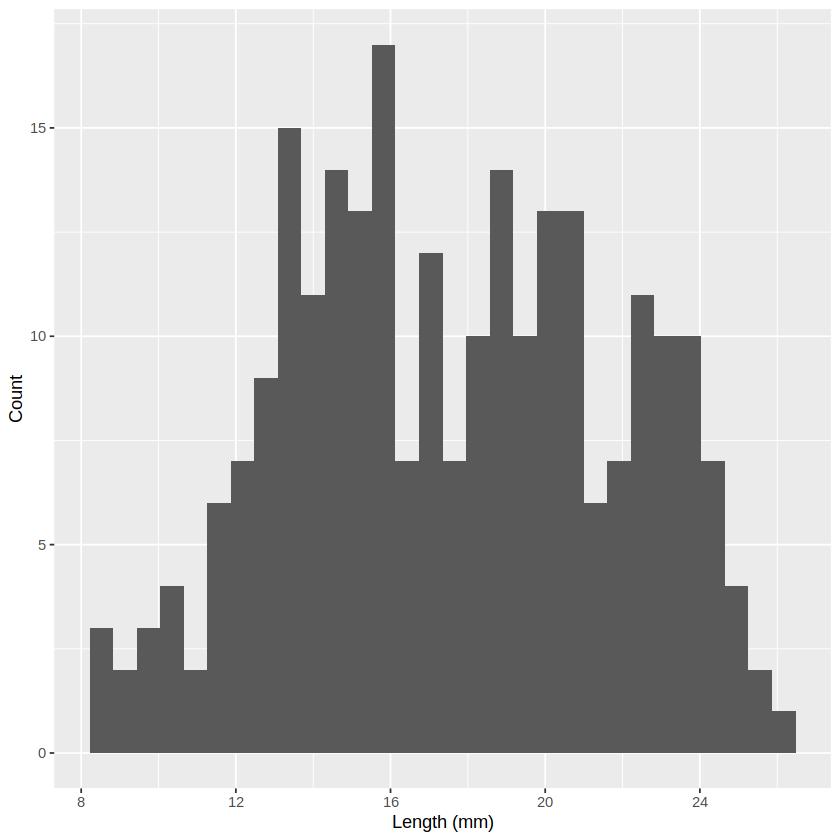

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


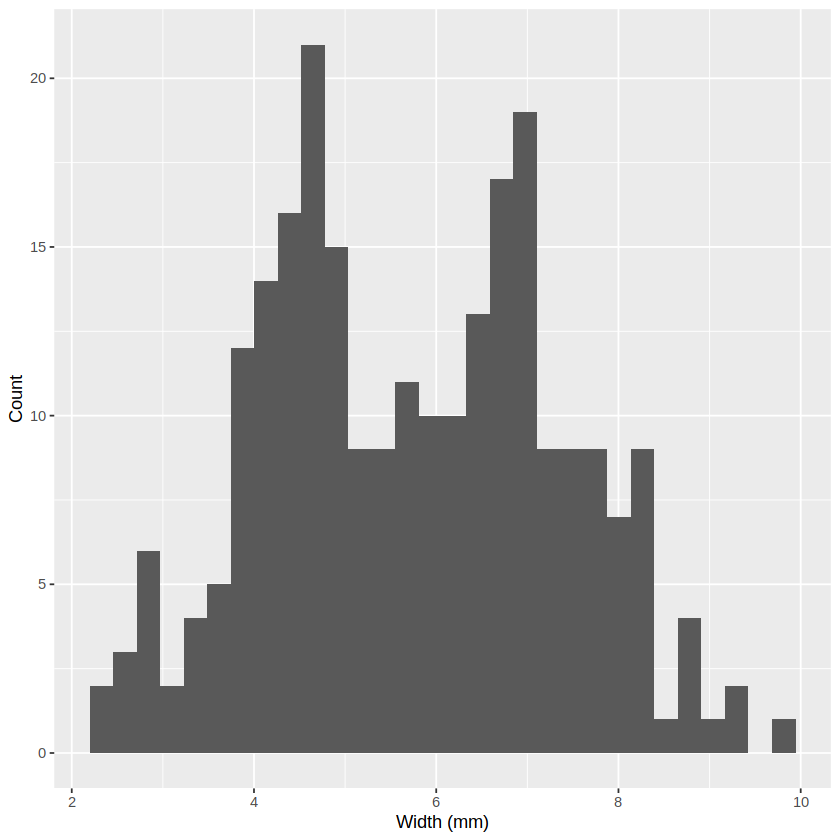

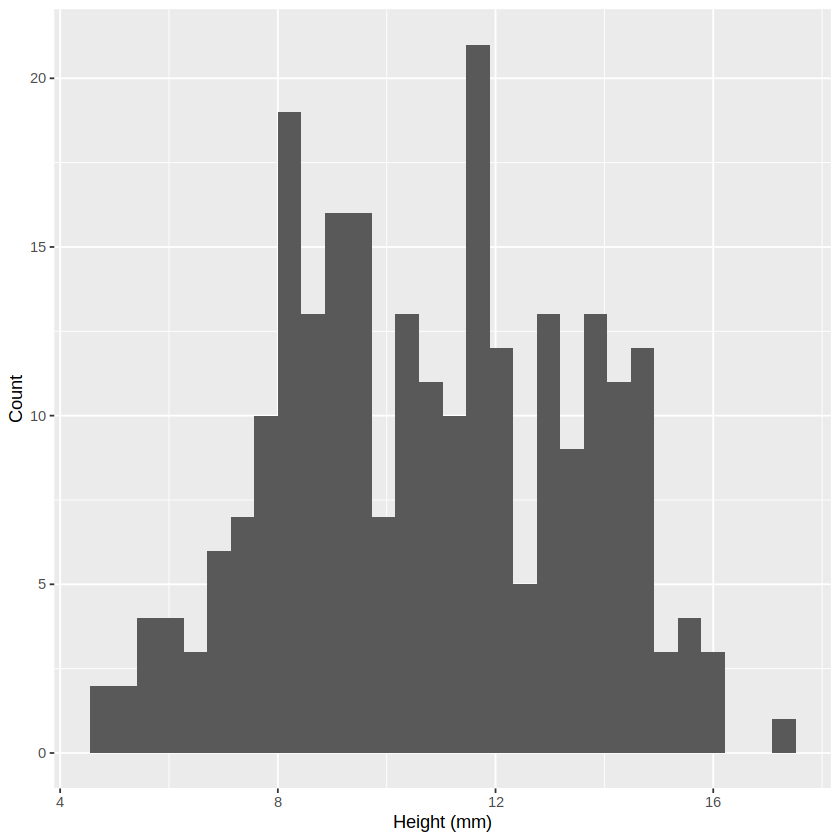

In [6]:
#histogram of the distrubtion of lenth
length_distrubtion <- training_data |>
ggplot(aes(x = l)) +
geom_histogram() +
labs(x = "Length (mm)", y = "Count")
length_distrubtion

#histogram of the distrubtion of width
width_distrubtion <- training_data |>
ggplot(aes(x = w)) +
geom_histogram() +
labs(x = "Width (mm)", y = "Count")
width_distrubtion

#histogram of the distrubtion of height
height_distrubtion <- training_data |>
ggplot(aes(x = h)) +
geom_histogram() + 
labs(x = "Height (mm)", y = "Count")
height_distrubtion

**Method**
1. Use the k-nearest-neighbors classification model by splitting our data proportionally (0.75 and 0.25) to a training and testing subset respectively.
2. Fix the issue of oversampling by making our classes count proportionally equal.
3. Find the cross-validation accuracy to evaluate the accuracy of our predictions and find which K-value has the best fit
4. From our dataset, use length, width, and height as predictors (all measured in millimeters). 
5. Visualize this data by using color-coded scatterplots. (We also used histograms to display the spread of data in our preliminary exploration.)
6. Record analysis and any other required information, giving concluding statements on the accuracy of our classification. 


**Expected Outcomes and Significance**

We hypothesize that a K-value around 3-6 would predict the radial class patterns most accurately—it’s not too large or small. We expect that length, width, and height will be reliable predictors of radial class pattern, ideally yielding a 75% accuracy. 

These findings could be utilized to further understand the qualities of Donacilla cornea shells and how their radial class patterns develop during their life cycle. 

Other possible questions to consider are:
1. Are the length, width, and height predictors effective/relevant?
2. Could we use the ratios as more reliable predictors instead? 
3. Are there other factors we should consider that’s outside of the dataset?

**References List**

(Creative Commons — Attribution-NonCommercial-ShareAlike 4.0 International — CC BY-NC-SA 4.0, n.d.; Whiteley et al., 1997)

Whiteley, D., Owen, D. F., & David. (1997). Massive polymorphism and natural selection in Donacilla cornea (Poli, 1791) (Bivalvia: Mesodesmatidae). Biological Journal of the Linnean Society, 62(4), 475–494. https://doi.org/10.1111/j.1095-8312.1997.tb00316.x